# Python NLTK sentiment analysis 

*Sources_from : Peter Nagy's kaggle page* 

__Sentiment Analysis : the process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc is postive, negative, or neutral.__

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
%matplotlib inline 

from subprocess import check_output

In [3]:
data=pd.read_csv("Sentiment.csv")
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


we decided to only do sentiment analysis on the dataset, therefore we just selected only text and sentiment columns.

In [4]:
data=data[['sentiment','text']]
data.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


first of all, splitting the dataset into a training and a testing set. The test set is the 10% of the original dataset. For the particular analysis, we dropped the neutral tweets, as my goal was to only differentiate positive and negative tweets.

In [5]:
train,test=train_test_split(data,test_size=0.1)
train=train[train['sentiment']!="Neutral"]

as a next step, we separated the Positive and negative tweets of the training set in order to easily visualize their contained word. After that i cleaned the text from hashtags, mentions and links,. Now they were ready for a Wordcloud visualizaion whcih shows only the most emphatic words of the Positve and Negative tweets.

Positive words


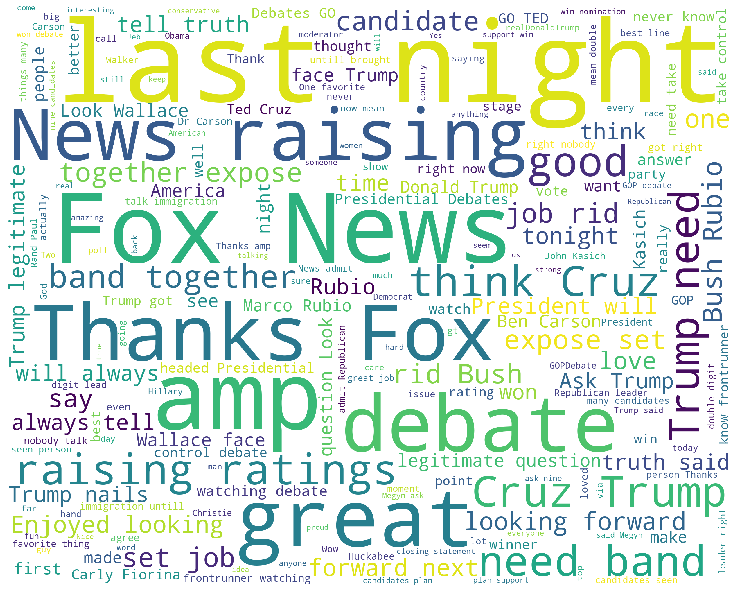

negative words


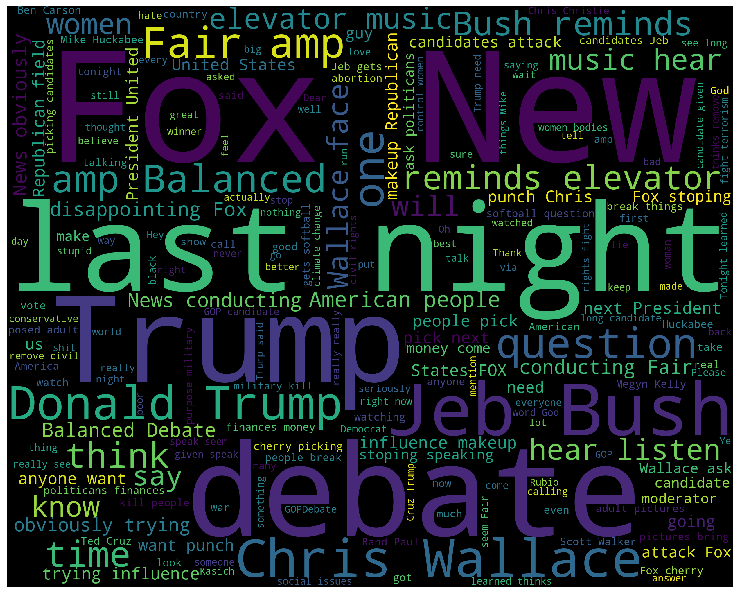

Wall time: 37.7 s


In [7]:
%%time
train_pos=train[train['sentiment']=="Positive"]
train_pos=train_pos["text"]
train_neg=train[train['sentiment']=="Negative"]
train_neg=train_neg['text']

def wordcloud_draw(data,color="black"):
    words=' '.join(data)
    cleaned_word=" ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and not word.startswith("#") and word!="RT"])
    wordcloud=WordCloud(stopwords=STOPWORDS,background_color=color,width=2500,height=2000).generate(cleaned_word)
    plt.figure(1,figsize=[13,13])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,color="white")
print("negative words")
wordcloud_draw(train_neg)